In [14]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle

!kaggle datasets download -d mdhamani/goodreads-books-100k --unzip -p /content/dataset

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mdhamani/goodreads-books-100k
License(s): CC0-1.0
 95% 42.0M/44.2M [00:00<00:00, 223MB/s]
100% 44.2M/44.2M [00:00<00:00, 217MB/s]


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = '/content/dataset/GoodReads_100k_books.csv'
df = pd.read_csv(filename)

df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [36]:
df.shape

(100000, 13)

Percebemos que o dataset contém uma quantidade significativa de dados faltantes em relação aos livros. Diante disso, decidimos optar pela remoção dessas entradas, pois o objetivo da análise é identificar os livros mais recomendados e de melhor qualidade para os usuários. Para garantir a precisão e relevância dos resultados, é essencial que todas as informações necessárias estejam completas.

In [37]:
df.isnull().sum()

,0
author,0
bookformat,3228
desc,6772
genre,10467
img,3045
isbn,14482
isbn13,11435
link,0
pages,0
rating,0


Para lidar com isso, utilizamos duas funções: uma para remover as linhas com dados faltantes e outra para eliminar possíveis duplicatas.

In [57]:
df_new = df.dropna().drop_duplicates()

df_new.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,875848419,9.78E+12,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119


In [58]:
df_new.shape

(72255, 13)

In [59]:
df_new.isnull().sum()

,0
author,0
bookformat,0
desc,0
genre,0
img,0
isbn,0
isbn13,0
link,0
pages,0
rating,0


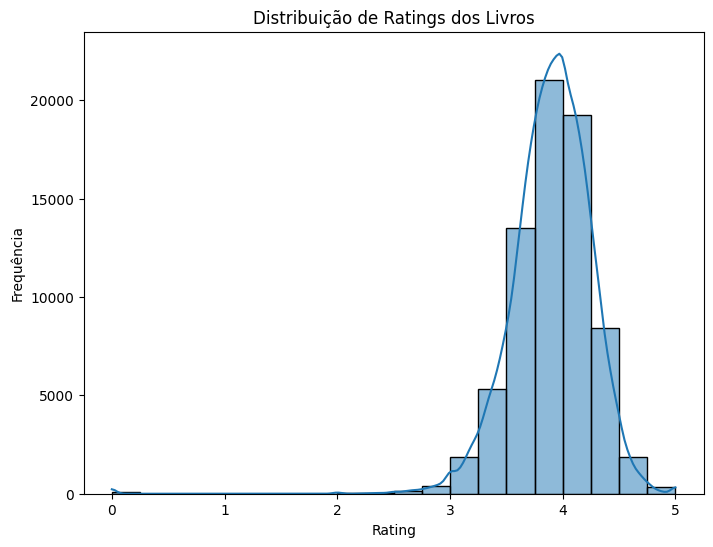

In [101]:
plt.figure(figsize=(8, 6))
sns.histplot(df_new['rating'], bins=20, kde=True)
plt.title('Distribuição de Ratings dos Livros')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.show()

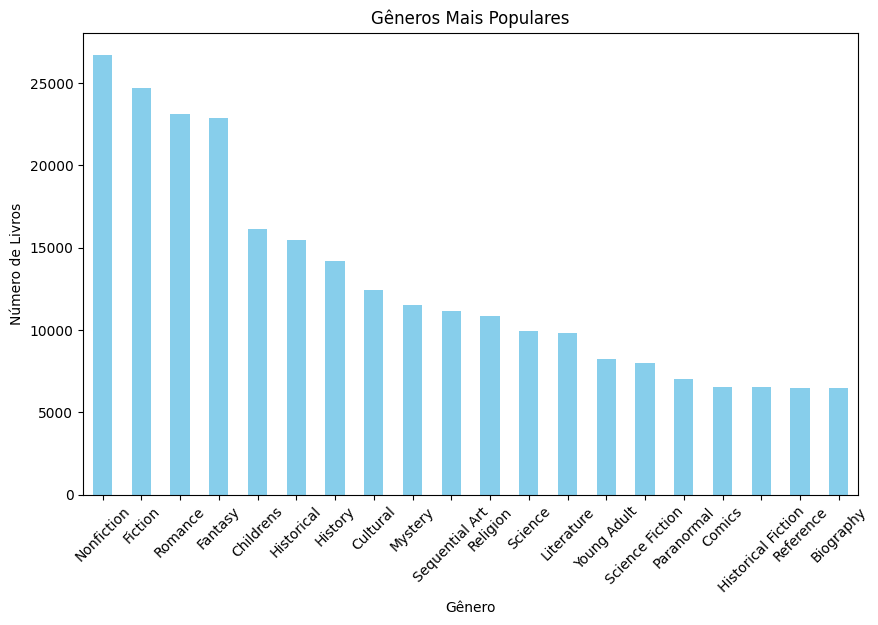

In [102]:
genre_count = df_new['genre'].str.split(',', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
genre_count.head(20).plot(kind='bar', color='skyblue')
plt.title('Gêneros Mais Populares')
plt.xlabel('Gênero')
plt.ylabel('Número de Livros')
plt.xticks(rotation=45)
plt.show()

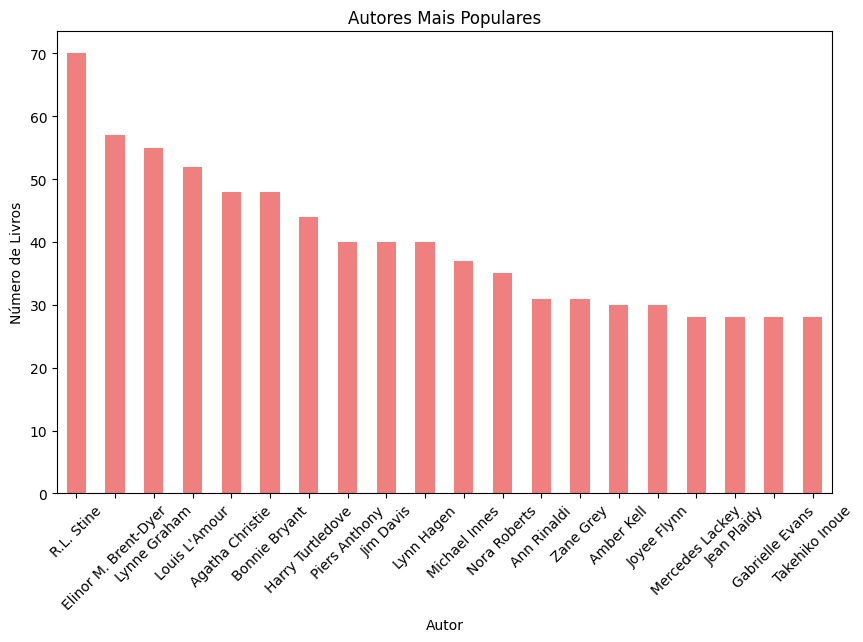

In [103]:
author_count = df_new['author'].value_counts()

plt.figure(figsize=(10, 6))
author_count.head(20).plot(kind='bar', color='lightcoral')
plt.title('Autores Mais Populares')
plt.xlabel('Autor')
plt.ylabel('Número de Livros')
plt.xticks(rotation=45)
plt.show()

In [116]:
max_rating = df_new['rating'].max()
min_rating = df_new['rating'].min()

top_rating_books = df_new[df_new['rating'] == max_rating]
bottom_rating_books = df_new[df_new['rating'] == min_rating]

In [117]:
top_books = top_rating_books[['title', 'author', 'rating', 'pages', 'genre']]
print(top_books)

                                                   title  \
86                Jazz Country: Ralph Ellison in America   
154    Queen's Mate: Three Women of Power in France o...   
910    Offerings to the Discerning Eye: An Egyptologi...   
982    The Adventure of Reason: Interplay Between Phi...   
2975   The New York Times Will Shortz Presents Easy t...   
...                                                  ...   
94845  The Great War of Words: British, American and ...   
95077  Psychoanalyzing Cinema: A Productive Encounter...   
95285  The Armoured Forces of the Bulgarian Army 1936...   
96107   The Games of Tigran Petrosian Volume 2 1966-1983   
97610  Dynamic Urban Design: A Handbook for Creating ...   

                                                  author  rating  pages  \
86                                      Horace A. Porter     5.0    184   
154                                    Pauline Matarasso     5.0    332   
910                                          Sue D'Aur

In [118]:
bottom_books = bottom_rating_books[['title', 'author', 'rating', 'pages', 'genre']]
print(bottom_books)

                                                   title  \
237    The Unemployed People's Movement: Leftists, Li...   
326                  Foliations and Geometric Structures   
1513              Mac 2000: Cartoons from the Daily Mail   
1696                                Russia and the Peace   
3520   Women's Anger: Clinical and Developmental Pers...   
...                                                  ...   
94850  Places of Encounter, Volume 1: Time, Place, an...   
94978  Health, Illness and Disease: Philosophical Essays   
95335  Comrades in Health: U.S. Health Internationali...   
95476  Fundamentals of the Theory of Operator Algebra...   
95563                                  Logic in Theology   

                                             author  rating  pages  \
237                                James J. Lorence     0.0    328   
326                                   Aurel Bejancu     0.0    300   
1513                      Stan McMurtry,Mark Bryant     0.0    128   

In [120]:
num_top_books = top_rating_books.shape[0]
num_bottom_books = bottom_rating_books.shape[0]

print(num_top_books)
print(num_bottom_books)

124
88


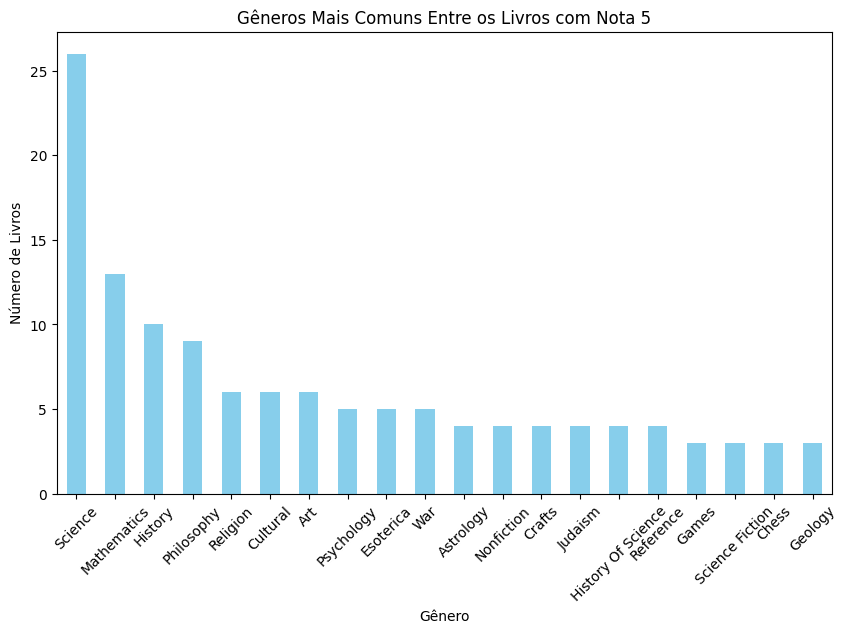

In [106]:
top_genres = top_rating_books['genre'].str.split(',', expand=True).stack().value_counts()

top_genres.head(20).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Gêneros Mais Comuns Entre os Livros com Nota 5')
plt.xlabel('Gênero')
plt.ylabel('Número de Livros')
plt.xticks(rotation=45)
plt.show()

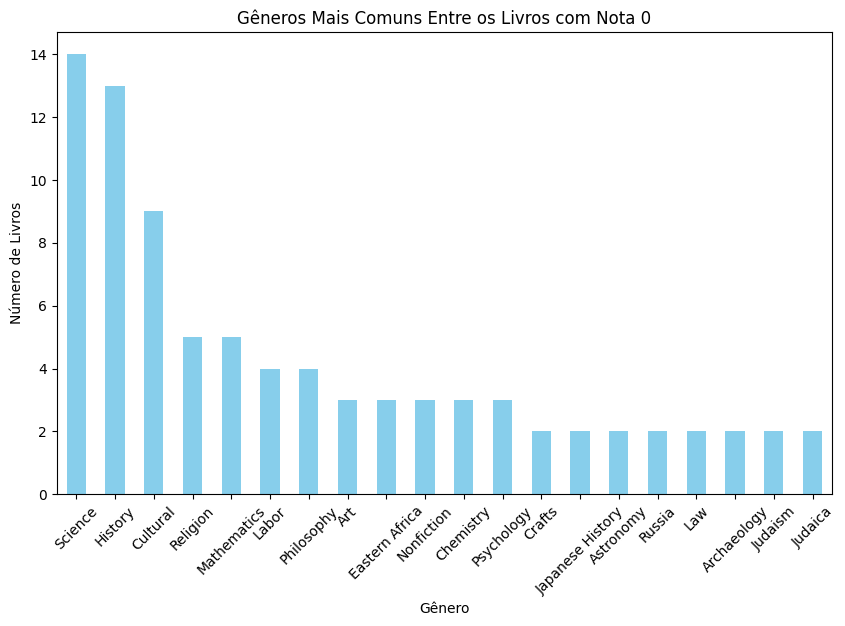

In [121]:
bottom_genres = bottom_rating_books['genre'].str.split(',', expand=True).stack().value_counts()

bottom_genres.head(20).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Gêneros Mais Comuns Entre os Livros com Nota 0')
plt.xlabel('Gênero')
plt.ylabel('Número de Livros')
plt.xticks(rotation=45)
plt.show()